# K Nearest Neighbour Model for Tumour Classification
## A. Binary Task
### Build a classifier to identify whether there is a tumor in the MRI images.

Import necessary libraries, matplotlib, pandas, numpy, sklearn, PIL and os module

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from PIL import Image                 #Use PIL for image size reduction
import os                             #Import os module
from os import path

Read label.csv and define image data folder path

In [7]:
csv_array = pd.read_csv('./dataset/label.csv')

dir_image = "./dataset/image/"
dir_img256 = "./dataset/image256/"

if path.exists(dir_img256) == 'false':
    os.makedirs(dir_img256)

Read 3000 images data into "imgs" array; each image is flattened into one row;
Modify csv_array.label to adapt to binary clasification (only "no_tumor" and "has_tumor" are valid labels)

In [8]:
rows, cols = (3000, 65536)            #rows is data set size; cols is width*length (after image size reduction. Here is 256*256)
     
imgs = np.zeros((rows,cols))          #Initialize an array for all reduced images

basewidth = 256                       #Target image width is 256; original width is 512
img = Image.open("./dataset/image/IMAGE_0000.jpg")
wpercent = float(basewidth) / float(img.size[0])       #use "256/512" as resize ratio (wpercent)
hsize = int((float(img.size[1]) * float(wpercent)))    #calculated target image height using resize ratio (wpercent)

for i in range(rows):                 #Reduce every image's size and save them in 'dir_img256' folder
    img = Image.open(dir_image + csv_array.file_name[i])
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img.save(dir_img256 + csv_array.file_name[i])

for i in range(rows):                 #Read every resized image and reduce it from RGB to grayscale format. Transform it to 1-d array. Store all images in a 2-d array, imgs. 
    img = mpimg.imread(dir_img256 + csv_array.file_name[i])[...,0]
    imgs[i] = img.flatten()
print(imgs.shape)

for i in range(rows):
    if csv_array.label[i] != "no_tumor" :
        csv_array.label[i] = "has_tumor" #only no_tumor and has_tumor are valid labels for binary clasifcation task

(3000, 65536)


Split train/test data set by 9:1

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(imgs, csv_array.label[0:rows],test_size=0.10, random_state=0) 
#test_size= should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
#everytime you run it without specifying random_state, you will get a different result, this is expected behavior
#print (len(X_test), len(y_test))

print('train set: {}  | test set: {}'.format(round(((len(y_train)*1.0)/len(imgs)),3),
                                                       round((len(y_test)*1.0)/len(imgs),3)))


Train KNNClassifier and predict based on test data set
Print accuracy score

In [6]:
def KNNClassifier(X_train, y_train, X_test,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) # Fit KNN model

    Y_pred = neigh.predict(X_test)
    return Y_pred

score=np.zeros(150)
for k in range(1,151):
    Y_pred = KNNClassifier(X_train, y_train, X_test, k)
    score[k-1] = metrics.accuracy_score(y_test,Y_pred)
    print("Test on K = ", k, ". Score = ", score[k-1])
print(score)

Test on K =  1 . Score =  0.9533333333333334
Test on K =  2 . Score =  0.9266666666666666
Test on K =  3 . Score =  0.9066666666666666
Test on K =  4 . Score =  0.9033333333333333
Test on K =  5 . Score =  0.9
Test on K =  6 . Score =  0.8933333333333333
Test on K =  7 . Score =  0.88
Test on K =  8 . Score =  0.8833333333333333
Test on K =  9 . Score =  0.88
Test on K =  10 . Score =  0.8733333333333333
Test on K =  11 . Score =  0.8733333333333333
Test on K =  12 . Score =  0.8633333333333333
Test on K =  13 . Score =  0.8666666666666667
Test on K =  14 . Score =  0.8666666666666667
Test on K =  15 . Score =  0.8566666666666667
Test on K =  16 . Score =  0.8633333333333333
Test on K =  17 . Score =  0.8633333333333333
Test on K =  18 . Score =  0.86
Test on K =  19 . Score =  0.8633333333333333
Test on K =  20 . Score =  0.86
Test on K =  21 . Score =  0.86
Test on K =  22 . Score =  0.8533333333333334
Test on K =  23 . Score =  0.8533333333333334
Test on K =  24 . Score =  0.8466666

Plot model scores against chosen K values in 1-10

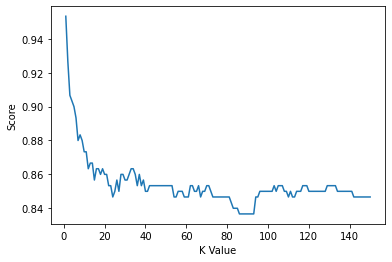

The best score is  0.9533333333333334  for K =  1


In [7]:
plt.plot(range(1,151),score)
plt.xlabel("K Value")
plt.ylabel("Score")
plt.show()

print("The best score is ", np.amax(score), " for K = ", np.argmax(score)+1)

The rest code is for testing on new released test data set!

In [13]:
csv_array = pd.read_csv('./test-2/label.csv')

dir_image = "./test-2/image/"
dir_img256 = "./test-2/image256/"

if path.exists(dir_img256) == 'false':
    os.makedirs(dir_img256)

In [15]:
rows, cols = (200, 65536)            #rows is data set size; cols is width*length (after image size reduction. Here is 256*256)
     
imgs = np.zeros((rows,cols))          #Initialize an array for all reduced images

basewidth = 256                       #Target image width is 256; original width is 512
img = Image.open("./test-2/image/IMAGE_0000.jpg")
wpercent = float(basewidth) / float(img.size[0])       #use "256/512" as resize ratio (wpercent)
hsize = int((float(img.size[1]) * float(wpercent)))    #calculated target image height using resize ratio (wpercent)

for i in range(rows):                 #Reduce every image's size and save them in 'dir_img256' folder
    img = Image.open(dir_image + csv_array.file_name[i])
    img = img.resize((basewidth, hsize), Image.ANTIALIAS)
    img.save(dir_img256 + csv_array.file_name[i])

for i in range(rows):                 #Read every resized image and reduce it from RGB to grayscale format. Transform it to 1-d array. Store all images in a 2-d array, imgs. 
    img = mpimg.imread(dir_img256 + csv_array.file_name[i])[...,0]
    imgs[i] = img.flatten()
print(imgs.shape)

for i in range(rows):
    if csv_array.label[i] != "no_tumor" :
        csv_array.label[i] = "has_tumor" #only no_tumor and has_tumor are valid labels for binary clasifcation task

(200, 65536)


In [16]:
def KNNClassifier(X_train, y_train, X_test,k):

    #Create KNN object with a K coefficient
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train) # Fit KNN model

    Y_pred = neigh.predict(X_test)
    return Y_pred

Y_pred = KNNClassifier(X_train, y_train, imgs, 1)
metrics.accuracy_score(csv_array.label,Y_pred)

0.975